In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from training_utils import CIFAR10_dataloaders, training_monitor

In [2]:
class CNNStride(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            # Convolutional layers with strided conv instead of MaxPool
            nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=2),  # Downsample
            nn.ReLU(),

            nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=2),  # Downsample
            nn.ReLU(),

            # Flatten
            nn.Flatten(),

            # Fully connected layers
            nn.Linear(64 * 8 * 8, 128),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(128, 10)  # Output layer
        )

    def forward(self, x):
        return self.model(x)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/10 [00:00<?, ?it/s]

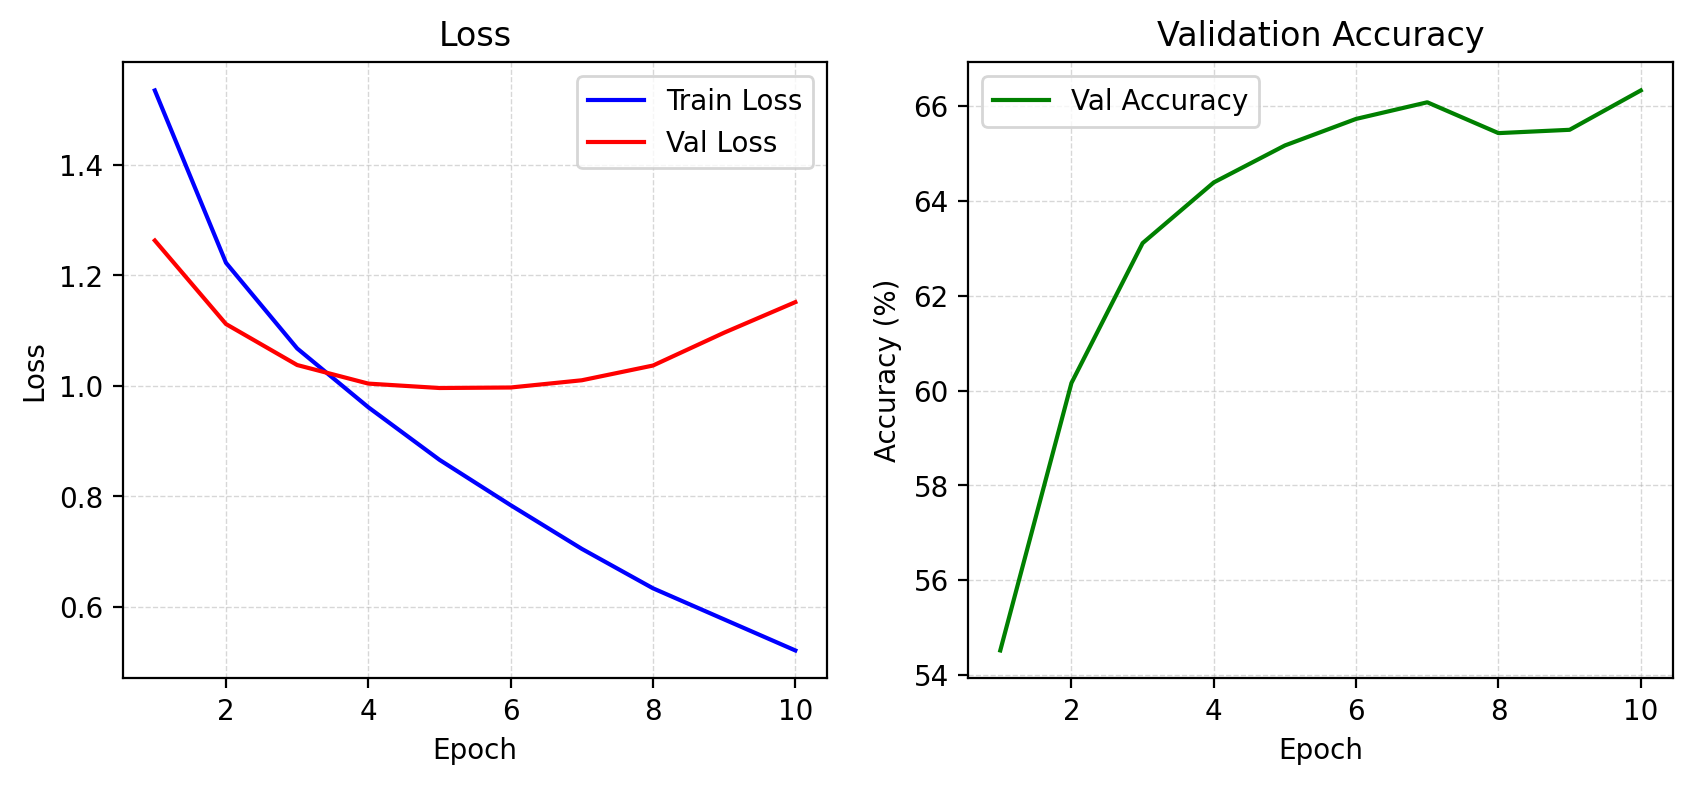

Epoch 10/10: 100%|##########| 10/10 [01:01<00:00,  6.12s/it, Train Loss: 0.5210, Val Loss: 1.1515, Val Acc: 66…

|       Epoch        |     Train loss     |  Validation loss   | Validation accuracy, %  |
__________________________________________________________________________________________
|         1          |       1.5347       |       1.2631       |         54.5200         |
|         2          |       1.2228       |       1.1119       |         60.1600         |
|         3          |       1.0677       |       1.0377       |         63.1100         |
|         4          |       0.9612       |       1.0041       |         64.3900         |
|         5          |       0.8661       |       0.9961       |         65.1700         |
|         6          |       0.7840       |       0.9970       |         65.7300         |
|         7          |       0.7049       |       1.0101       |         66.0800         |
|         8          |       0.6335       |       1.0368       |         65.4300         |
|         9          |       0.5772       |       1.0963       |         65.5000         |

In [3]:
trainloader, testloader, classes = CIFAR10_dataloaders(batch_size=64)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNStride().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

trained_model = training_monitor(device, model, optimizer, criterion, num_epochs, trainloader, testloader)
